In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [2]:
data = pd.read_csv('C:\Acadgild Desk\kc_house_data.csv')

In [3]:
print(len(data))
print(len(data.columns))
print(data.dtypes.unique())

21613
21
[dtype('int64') dtype('O') dtype('float64')]


In [4]:
data.select_dtypes(include=['O']).columns.tolist()


['date']

In [5]:
print(data.isnull().any().sum(), ' / ', len(data.columns))
print(data.isnull().any(axis=1).sum(), ' / ', len(data))

0  /  21
0  /  21613


In [6]:
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name

In [7]:
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [8]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


In [9]:
y = data.loc[:,['sqft_living','grade',target]].sort_values(target, ascending=True).values
x = np.arange(y.shape[0])

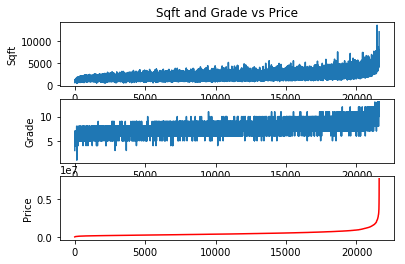

In [10]:
%matplotlib inline
plt.subplot(3,1,1)
plt.plot(x,y[:,0])
plt.title('Sqft and Grade vs Price')
plt.ylabel('Sqft')

plt.subplot(3,1,2)
plt.plot(x,y[:,1])
plt.ylabel('Grade')

plt.subplot(3,1,3)
plt.plot(x,y[:,2],'r')
plt.ylabel("Price")

plt.show()

In [11]:
regr = linear_model.LinearRegression()
new_data = data[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]

In [12]:
X = new_data.values
y = data.price.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
regr.fit(X_train, y_train)
print(regr.predict(X_test))

[1270107.77651124  507178.119764    411156.76563853 ...   51438.48542106
  653676.58328639 1587892.83506617]


In [15]:
regr.score(X_test,y_test)

0.696736681826096

In [16]:
print("RMSE: %.2f"
      % math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

RMSE: 206646.26
